<a href="https://colab.research.google.com/github/kozyreviva/Data_Science/blob/main/statistic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="4"><b>Определение перспективного тарифа для телеком-компании</b></font>


Имеется два тарифных плана: «Смарт» и «Ультра».

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 3 рубля
  * сообщение: 3 рубля
  * 1 Гб интернет-трафика: 200 рублей
**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 1 рубль
  * сообщение: 1 рубль
  * 1 Гб интернет-трафика: 150 рублей
  
Задача: Определить какой тарифа приносит больший доход.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**План**

* Приведение данных к нужным типам
* Проверка на наличие ошибок и их исправление
* Подсчет для каждого пользователя:
  * количество сделанных звонков и израсходованных минут разговора по месяцам;
  * количество отправленных сообщений по месяцам;
  * объем израсходованного интернет-трафика по месяцам;
  * помесячную выручку с каждого пользователя.
* Провести анализ данных
* Проверить гипотезы:
  * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
  * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

 **Откройте файл с данными и изучите общую информацию** 

 Подключаем необходимые библиотеки.

In [ ]:
import pandas as pd                                                            #импорт библиотек
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

Открываем файлы датасетов.
Учтём путь загрузки.

In [ ]:
try:                                                                           #открытие файлов
  calls_df = pd.read_csv("/datasets/calls.csv")
  internet_df = pd.read_csv("/datasets/internet.csv",index_col = 0)
  messages_df = pd.read_csv("/datasets/messages.csv")
  tariffs_df = pd.read_csv("/datasets/tariffs.csv")
  users_df = pd.read_csv("/datasets/users.csv")
except:
  calls_df = pd.read_csv("calls.csv")
  internet_df = pd.read_csv("internet.csv",index_col = 0)
  messages_df = pd.read_csv("messages.csv")
  tariffs_df = pd.read_csv("tariffs.csv")
  users_df = pd.read_csv("users.csv")

Выведем все датасеты на экран по 5 строк и информацию по ним.

In [ ]:
calls_df.head()                                                                 #вывод на экран таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
calls_df.info()                                                                 #вывод на экран информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
internet_df.head()                                                              #вывод на экран таблицы

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet_df.info()                                                              #вывод на экран информации

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
messages_df.head()                                                              #вывод на экран таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
messages_df.info()                                                              #вывод на экран информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
tariffs_df.head()                                                               #вывод на экран таблицы

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs_df.info()                                                               #вывод на экран информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
users_df.head()                                                                 #вывод на экран таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
users_df.info()                                                                 #вывод на экран информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Описание данных**

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



**Краткий вывод о данных**

Из представленных таблиц видно что в данных нет пропусков(в таблице 'users_df' столбце 'churn_date' пропуски обоснованы тем что тариф действующий и нет даты окончания). 
Можно заметить что во всех таблицах идёт несоответствие типов данных в столбцах содержащих дату.

**Предобработка данных**

В 4 таблицах есть данные содержащие дату, они записаны в неправильном формате.

'reg_date', 'churn_date', 'session_date', 'call_date', ',message_date' столбцы в таблицах которые требуют исправления.

In [ ]:
users_df["reg_date"] = pd.to_datetime(users_df["reg_date"],format = "%Y-%m-%d")                         #форматироване даты в таблицах
users_df["churn_date"] = pd.to_datetime(users_df["churn_date"],format = "%Y-%m-%d")
calls_df["call_date"] = pd.to_datetime(calls_df["call_date"],format = "%Y-%m-%d" )
messages_df["message_date"] = pd.to_datetime(messages_df["message_date"],format = "%Y-%m-%d")
internet_df["session_date"] = pd.to_datetime(internet_df["session_date"],format = "%Y-%m-%d" )

Проверим изменения.

In [ ]:
print(users_df.info())                                                          #вывод ницормации о таблицах
print(calls_df.info())
print(messages_df.info())
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float6

В таблицах 'calls_df' и 'internet_df' есть столбцы 'duration' и 'mb_used' их можно округлить в большую сторону и привести к типу int для удобства работы т.к. секунды и килобайты не так важны(при совершении звонка в 10 секунд списание идет как за 1 минуту, следовательно в секундах нет большой необходимости).

In [ ]:
calls_df["duration"] = np.ceil(calls_df["duration"]).astype(int)        #округление в большую сторону со сменой типа данных
internet_df["mb_used"] = np.ceil(internet_df["mb_used"]).astype(int)

Проверим изменения.

In [ ]:
print(calls_df.info())                                                          #вывод информации о таблице
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB
None


**Вывод**
Столбцы даты были записаны в неправильном формате из-зи изначального неправильного определения формата. Некоторые столбцы имели нужный формат, но для работы с данными пришлось его изменить.

**Подсчитайте для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам**

Применим сводную таблицу на датафрейме 'calls_df'. 
Пользователя выделим по 'user_id', месяц возьмём из столбца 'call_date', значения определим по столбцу 'duration'.

In [ ]:
pt_calls = calls_df.pivot_table(index = ["user_id",calls_df.call_date.dt.month],
                                values = "duration", aggfunc = ("count","sum"))                 #построение сводной таблицы
pt_calls.head()                                                                                 #вывод на экран

count  sum
user_id call_date            
1000    5             22  159
        6             43  172
        7             47  340
        8             52  408
        9             58  466

**Посчитайте для каждого пользователя количество отправленных сообщений по месяцам**

Построим сводную талицу из датафрейма 'messages_df' по похожему принципу.

In [ ]:
pt_messages = messages_df.pivot_table(index = ["user_id",messages_df.message_date.dt.month],
                                      values = "id", aggfunc = "count")                  #построение сводной таблицы
pt_messages.head()                                                                       #вывод таблицы на экран

id
user_id message_date    
1000    5             22
        6             60
        7             75
        8             81
        9             57

**Посчитайте для каждого пользователя объем израсходованного интернет-трафика по месяцам**

Построим сводную таблицу из 'internet_df'.

In [ ]:
pt_internet = internet_df.pivot_table(index = ["user_id",internet_df.session_date.dt.month],
                                      values = "mb_used", aggfunc = "sum")                # построение сводной таблицы
pt_internet.head()                                                                        #вывод таблицы на экран

mb_used
user_id session_date         
1000    5                2256
        6               23257
        7               14016
        8               14070
        9               14581

**Посчитайте помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).**

Приступим к объединению таблиц.

Объеденим таблицу 'users_df' и 'tariffs_df'.

In [ ]:
user_tariff_df = users_df.join(tariffs_df.set_index("tariff_name"),
                               on = "tariff", how = "outer").sort_index()        #объединение таблиц
user_tariff_df.head()                                                           #вывод таблицы на экран

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


Приведем pt_calls, pt_internet, pt_messages к виду удобному для объединения таблиц.

In [ ]:
pt_calls = pt_calls.reset_index()                                               #сброс индекса
pt_internet = pt_internet.reset_index()
pt_messages = pt_messages.reset_index()
pt_calls = pt_calls.rename(columns = {"call_date":"month","count":"count_calls","sum":"sum_calls"})               #изменение названий столбцов
pt_internet = pt_internet.rename(columns ={"session_date":"month"})
pt_messages = pt_messages.rename(columns = {"message_date":"month","id":"sum_msg"})

Объеденим pt_calls, pt_internet, pt_messages.
И заполним все пропуски нулями.

In [ ]:
df_combine = pt_calls.set_index(["user_id","month"]).join(other = [pt_internet.set_index(["user_id","month"]),
                                                                   pt_messages.set_index(["user_id","month"])],
                                                                   how= "outer").reset_index()                  #объединение таблиц
df_combine = df_combine.fillna(0)                                                                               #заполнение пропусков нулями

Соединим таблицы user_tariff_df и df_combine.
Проверим на наличие пропусков

In [ ]:
df_combine = df_combine.merge(user_tariff_df.set_index("user_id"),
                              how = "outer", on = "user_id")              #объединение таблиц
df_combine.info()                                                               #вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   count_calls            3214 non-null   float64       
 3   sum_calls              3214 non-null   float64       
 4   mb_used                3214 non-null   float64       
 5   sum_msg                3214 non-null   float64       
 6   age                    3216 non-null   int64         
 7   churn_date             189 non-null    datetime64[ns]
 8   city                   3216 non-null   object        
 9   first_name             3216 non-null   object        
 10  last_name              3216 non-null   object        
 11  reg_date               3216 non-null   datetime64[ns]
 12  tariff                 3216 non-null   object        
 13  mes

Проверим 2 пользователей без данных по пользованию сотовой связи.

In [ ]:
df_combine.query("month.isna()",engine = "python")

,user_id,month,count_calls,sum_calls,mb_used,sum_msg,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


Видим что пользователи были зарегистрированны в самом конце года  и поэтому не имеют данных по пользованию тарифами.
Пользователей целесообразнее оставить т.к они показывают прирост клиентов.

Для подсчета выручки с каждого пользователя напишем функцию income_month().

In [ ]:
def income_month(row):                                                                             #функция подсчёта дохода
  calls_income = 0
  gb_income = 0
  msg_income = 0
  if((row.sum_calls - row.minutes_included) > 0):
    calls_income = (row.sum_calls - row.minutes_included) * row.rub_per_minute

  if((row.mb_used - row.mb_per_month_included) > 0):
    gb_income = (np.ceil((row.mb_used - row.mb_per_month_included)/1024)) * row.rub_per_gb

  if((row.sum_msg - row.messages_included) > 0):
    msg_income = (row.sum_msg - row.messages_included) * row.rub_per_message

  row["month_income"] = calls_income + gb_income + msg_income + row.rub_monthly_fee

  return row

Применим функцию на таблице df_income.

In [ ]:
df_combine = df_combine.apply(income_month, axis = 1)                           #применение функции

In [ ]:
# check

df_combine["month_income"].sum()

4928251.0

Проверим изменения.

In [ ]:
df_combine.head(10)                                                             #вывод таблицы на экран

,user_id,month,count_calls,sum_calls,mb_used,sum_msg,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_income
0,1000,5.0,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10.0,57.0,350.0,14717.0,73.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11.0,43.0,338.0,14768.0,58.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12.0,46.0,333.0,9827.0,70.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1001,11.0,59.0,430.0,18452.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15360,500,550,200,3,3,1350.0
9,1001,12.0,63.0,414.0,14053.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15360,500,550,200,3,3,550.0


Выведем на экран доход с каждого пользователя по месяцам.

In [ ]:
df_combine[["user_id","month","month_income"]].sort_values(by = ["user_id","month"]).head(10)      #таблица отображающая доход по месяцам

,user_id,month,month_income
0,1000,5.0,1950.0
1,1000,6.0,1950.0
2,1000,7.0,1950.0
3,1000,8.0,1950.0
4,1000,9.0,1950.0
5,1000,10.0,1950.0
6,1000,11.0,1950.0
7,1000,12.0,1950.0
8,1001,11.0,1350.0
9,1001,12.0,550.0


**Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.**

Построим сводную таблицу для тарифов с количеством минут разговора, трафиком и количеством сообщений распределённых по месяцам.

In [ ]:
df_combine.pivot_table(index = ["month","tariff"], values = ["sum_calls","mb_used","sum_msg"], aggfunc = "sum")    #построение сводной таблицы

mb_used  sum_calls  sum_msg
month tariff                               
1.0   smart    289831.0     6931.0    620.0
      ultra    118382.0     3853.0    304.0
2.0   smart    673461.0    17324.0   1397.0
      ultra    282887.0     7131.0    527.0
3.0   smart   1164537.0    30034.0   2453.0
      ultra    649423.0    18117.0   1195.0
4.0   smart   1509702.0    41119.0   3443.0
      ultra    926409.0    25191.0   1736.0
5.0   smart   2231353.0    54618.0   4762.0
      ultra   1298540.0    34192.0   2536.0
6.0   smart   2593622.0    64885.0   5478.0
      ultra   1591148.0    40295.0   3505.0
7.0   smart   3168466.0    82079.0   6784.0
      ultra   1866833.0    49667.0   4536.0
8.0   smart   3908561.0    99045.0   7905.0
      ultra   2096565.0    54653.0   5183.0
9.0   smart   4244377.0   111439.0   8746.0
      ultra   2210554.0    62036.0   6013.0
10.0  smart   4932898.0   125284.0   9927.0
      ultra   2467856.0    68644.0   7187.0
11.0  smart   5345940.0   137544.0  10768.0
      ultra   2653912.0    72545.0   7476.0
12.0  smart   6112113.0   161275.0  12130.0
      ultra   3032089.0    82400.0   8425.0

Построим диаграмму для каждого столбца для наглядности.

<AxesSubplot:xlabel='month'>

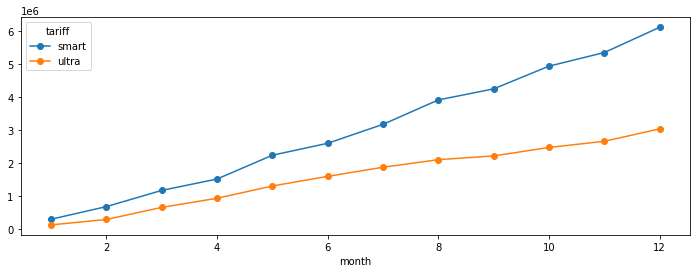

In [ ]:
(df_combine
 .pivot_table(index = "tariff",columns ="month", values = "mb_used", aggfunc = "sum")
 .T
 .plot(kind ="line",style ="o-",figsize = (12,4)))                                   # вывод диаграммы 

<AxesSubplot:xlabel='month'>

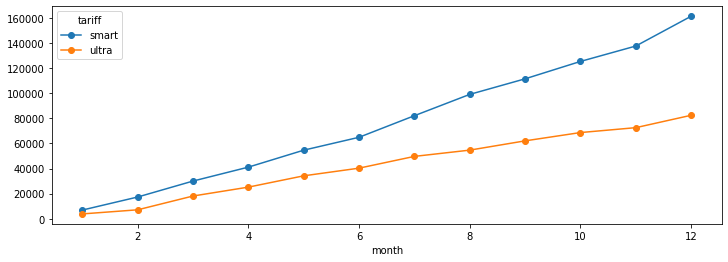

In [ ]:
(df_combine
 .pivot_table(index = "tariff",columns ="month", values = "sum_calls", aggfunc = "sum")
 .T
 .plot(kind ="line",style ="o-",figsize = (12,4)))                                          # вывод диаграммы

<AxesSubplot:xlabel='month'>

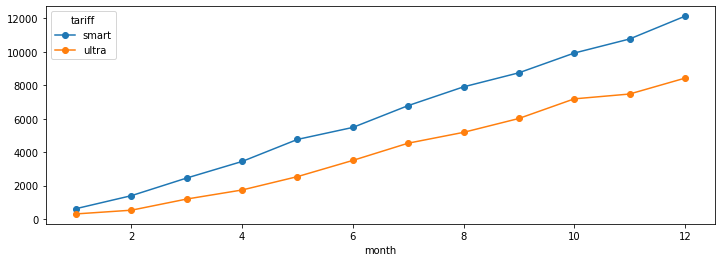

In [ ]:
(df_combine
 .pivot_table(index = "tariff",columns ="month", values = "sum_msg", aggfunc = "sum")
 .T
 .plot(kind ="line",style ="o-",figsize = (12,4)))                                         # вывод диаграммы

<AxesSubplot:xlabel='tariff'>

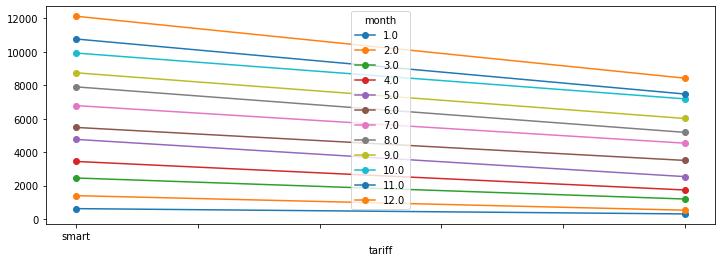

In [ ]:
(df_combine
 .pivot_table(index = "tariff",columns ="month", values = "sum_msg", aggfunc = "sum")
#  .T
 .plot(kind ="line",style ="o-",figsize = (12,4)))                                         # вывод диаграммы

Видно что показатели с каждым месяцем для каждого тарифа увеличиваются.

Выведем стандартное отклонение,среднее количество и дисперсию для звонков.

In [ ]:
for name, group_df in df_combine.groupby("tariff"):                             #выовод в цикле значений для каждого тарифа
  print(name)
  print("Среднее: {:.2f}".format(group_df.query("tariff == @name")["sum_calls"].mean()))
  print("Дисперсия: {:.2f}".format(group_df.query("tariff == @name")["sum_calls"].var()))
  print("Стандартное отклонение: {:.2f}".format(group_df.query("tariff == @name")["sum_calls"].std()))
  print("")

smart
Среднее: 417.93
Дисперсия: 36219.32
Стандартное отклонение: 190.31

ultra
Среднее: 526.62
Дисперсия: 100873.63
Стандартное отклонение: 317.61



Построим гистограмму для звонков по тарифам.

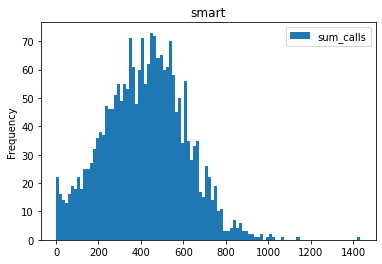

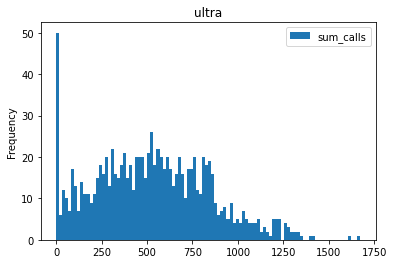

In [ ]:
for name, group_df in df_combine.groupby("tariff"):                             #постройка гистограмм для каждого тарифа
  group_df.plot(y = "sum_calls", kind = "hist", title = name, bins = 100)

На гистограммах видно нормальное распределение с пиковыми значениями в районе от 400 до 500 минут. На графике с тарифом ultra выделяется нулевое значение, это говорит об отсутствии звонков.

Выведем стандартное отклонение,среднееколичество и дисперсию для сообщений.

In [ ]:
for name, group_df in df_combine.groupby("tariff"):                             #выовод в цикле значений для каждого тарифа
  print(name)
  print("Среднее: ", group_df.query("tariff == @name")["sum_msg"].mean())
  print("Дисперсия: ", group_df.query("tariff == @name")["sum_msg"].var())
  print("Стандартное отклонение: ",group_df.query("tariff == @name")["sum_msg"].std())
  print("")

smart
Среднее:  33.384028712427096
Дисперсия:  796.8129584480083
Стандартное отклонение:  28.22787555676141

ultra
Среднее:  49.36345177664975
Дисперсия:  2285.266142544674
Стандартное отклонение:  47.80445735017472



Построим гистограммы для сообщений и разделим по тарифам.

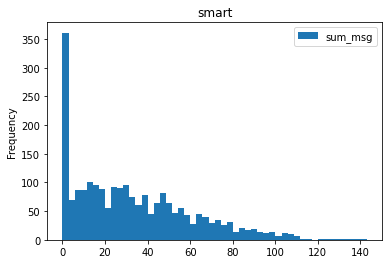

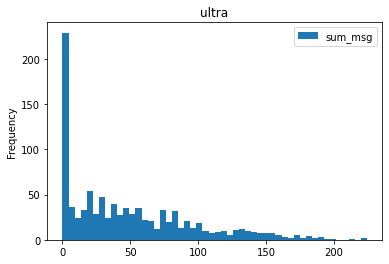

In [ ]:
for name, group_df in df_combine.groupby("tariff"):                             #постройка гистограмм для каждого тарифа
  group_df.plot(y = "sum_msg", kind = "hist", title = name, bins = 50)

На гистограммах видно что данные по сообщениям распеделены более полого, но для каждого тарифа можно выделить значения от 0 до 50 как пиковые, дальше количество сообщений идёт на спад.  Во двух тарифах имеется данные со значением 0, это говорит о том что большенство пользователей не пользуется сообщениями.

Выведем стандартное отклонение,среднееколичество и дисперсию для трафика.

In [ ]:
for name, group_df in df_combine.groupby("tariff"):                             #выовод в цикле значений для каждого тарифа
  print(name)
  print("Среднее: ", group_df.query("tariff == @name")["mb_used"].mean())
  print("Дисперсия: ", group_df.query("tariff == @name")["mb_used"].var())
  print("Стандартное отклонение: ",group_df.query("tariff == @name")["mb_used"].std())
  print("")

smart
Среднее:  16229.188425302826
Дисперсия:  34545911.12695753
Стандартное отклонение:  5877.576977544193

ultra
Среднее:  19486.90152284264
Дисперсия:  101935621.04821923
Стандартное отклонение:  10096.317202238608



Построим гистограммы трафика для каждого тарифа.

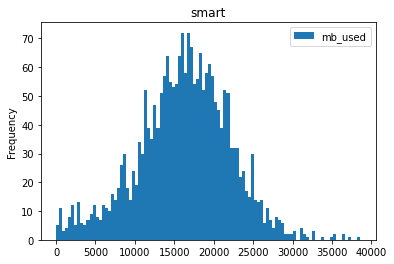

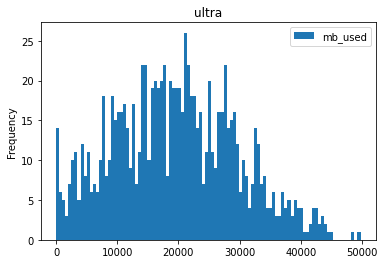

In [ ]:
for name, group_df in df_combine.groupby("tariff"):                             #постройка гистограмм для каждого тарифа
  group_df.plot(y = "mb_used", kind = "hist", title = name, bins = 100)

На гистограммаз видно нормальное распределение трафика с пиковым значением 14000 - 20000 для тарифа smart и 15000 - 22000 для ultra. При этом нулевое количество трафика не преобладает ни на одной гистограмме. Это говорит что большенство пользуется интернетом.

**Вывод**

Исходя из сводной таблицы разбитой помесяцам можно увидеть рост всех значений по месяцам. Косвенно можно предположить что количество пользователей растет.

Тариф smart характерен более высокая плотность в пиковых значениях
Тариф ultra более широкий, что доказывает дисперсия для всех значений.

Можно заметить ярковыраженные нулевые значения на гистограммах сообщений и звонков. Такие показатели говорят о том что для звонков и сообщений может быть использован интернет,который,исходя из гистограммы, характерен минимальными нулевыми значениями.

**ПРОВЕРКА ГИПОТЕЗ**

**Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Нулевая гипотеза: Средняя выручка для двух тарифов одинакова.

Альтернативная гипотеза: Средняя выучка для двух тарифов разная.

Для проверки гипотез нам нужны данные по каждому тарифу.

In [ ]:
ultra_income = ((df_combine.query('tariff == "ultra"')["month_income"]).astype(int)).array    #создание массива доходов по тарифу
ultra_income

<PandasArray>
[1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
 ...
 1950, 1950, 1950, 3750, 1950, 2400, 1950, 3300, 1950, 1950]
Length: 986, dtype: int64

In [ ]:
smart_income = ((df_combine.query('tariff == "smart"')["month_income"]).astype(int)).array    #создание массива доходов по тарифу
smart_income

<PandasArray>
[1350,  550,  550, 1150, 1550,  950,  550, 1350, 1150,  550,
 ...
 1685,  550, 2386, 1950, 1750,  550, 1150, 1513,  598,  550]
Length: 2230, dtype: int64

Списки созданы. 
При выводе списков на экран можно заметить разную длинну выборок.
В методе st.ttest_ind() аргумент equal variance будет равен False для того чтобы дисперсия считалась отдельно для двух выборок.

Значение alpha выставим на 5%.

Приступим к проверке гипотез. 
Применим метод scipy.stats.ttest_ind() и сохраним в переменную.

In [ ]:
alpha = .05                                                                     #уровень значимости

result  = st.ttest_ind(ultra_income,smart_income,equal_var = False)             #посчет значимости

Сравним значение alpha c pvalue для определения результата.

In [ ]:
print(result.pvalue)                                                            #результат сравнения выборок 
result.pvalue < alpha

1.2414049931248708e-246


True

P-value  показывает крайне маленькое значение, это говорит о высокой разнице между выборками. Примем альтернативную гипотезу.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Нулевая гипотеза: выручка пользователей из москвы одинакова с выручкой пользователей из других регионов.

Альтернативная гипотеза: выручка пользователей из Москвы и других регионов отличаются.

Приступим к проверке гипотез.
Разобьём выборки по городам и применим метод scipy.stats.ttest_ind(). Сохраним результат в переменную.

In [ ]:
result = st.ttest_ind(df_combine.query('city == "Москва"')["month_income"],
                      df_combine.query('city != "Москва"')["month_income"])    #подсчёт значимости

Выставим уровень статистической значимости на 0.05 и сравним показатели.

In [ ]:
alpha = .05                                                                     #уровень значимости

print(result.pvalue)                                                            #результат сравнения выборок
result.pvalue < alpha

0.5277299573181309


False

Вероятность 52% что средняя выручка в Москве и регионах одинакова. P-value показывает значение 0.52  что говорит что разница между выборками статистически не значима. Отвергнуть нулевую гипотезу не удалось.

In [ ]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Одна из двух гипотез была подтверждена. 

Сдедний доход по каждому тарифу действительно разные, что доказывает значение pvalue. 
Во второй гипотезе видно что значимая вероятность не переходит границу статистической значимости, следовательно гипотеза о разной величине дохода между Москвой и регионами отвергнута. Если увеличить уровень alpha то гипотеза могла быть подтверждена.

**Общие выводы**

При работе с таблицами был выявлен неправельный формат записи значений дат во всех таблицах. Такие значения могли быть неправилно записаны изначально либо появиться в ходе копирования из другой таблицы. Также некоторые значения были переведены в другой формат по причине необходимости этого,для дальнейшей работы с данными.

Все имеющиеся таблицы были объединены в одну для удобства работы по исследованию данных и подтверждения гипотез.

Анализ данных показал что в течении 2018 года количество пользователей обоих тарифов росло. Также пользователи в основном пользуются мобильной связью и активно используют интернет. Передача сообщений имеет место быть, но в основном показатели не такие высокие.

Выведем спредние показатели по сообшениям, звонкам и трафику по каждому тарифу.

In [ ]:
df_combine.pivot_table(index = "tariff", values = ["sum_calls","sum_msg","mb_used"], aggfunc = "mean")

,mb_used,sum_calls,sum_msg
tariff,,,
smart,16229.188425,417.934948,33.384029
ultra,19486.901523,526.623350,49.363452


Видим что средние показатели по всем трём видам передачи информации выше у тарифа ultra.

Произведем сравнение по городам. Сравним теже показатели по Москве и по регионам.

In [ ]:
print("Москва")
df_combine.query('city == "Москва"').pivot_table(index = "tariff", values = ["sum_calls","sum_msg","mb_used"], aggfunc = "mean")

Москва


,mb_used,sum_calls,sum_msg
tariff,,,
smart,16038.512953,417.481865,27.772021
ultra,21321.777778,557.791111,55.213333


In [ ]:
print("Регионы")
df_combine.query('city != "Москва"').pivot_table(index = "tariff", values = ["sum_calls","sum_msg","mb_used"], aggfunc = "mean")

Регионы


,mb_used,sum_calls,sum_msg
tariff,,,
smart,16269.123711,418.029843,34.559414
ultra,18943.681579,517.396053,47.631579


Показатели по тарифам для Москвы и регионов одинаково больше в тарифе ultra.

Произведём сравнение годовой выручки по тарфам.

Оценим доход от тарифов в процентах.

In [ ]:
print("Доход от тарифа ultra: {:.2f}%".format((df_combine.query('tariff == "ultra"')["month_income"].sum()/df_combine.month_income.sum())*100))
print("Доход от тарифа smart: {:.2f}%".format((df_combine.query('tariff == "smart"')["month_income"].sum()/df_combine.month_income.sum())*100))

Доход от тарифа ultra: 41.43%
Доход от тарифа smart: 58.57%


Показатели использования связи выше у тарифа ultra а большей доход на 17% приносит тариф smart.

Проверка гипотез показала сильное различие по среднему доходу между тарифами и отсутствие различия между доходом с пользователей из Москвы и других регионов.
